----------------------------------

# Visão Geral

- Exercícios: 15 min 

### Requisitos:
- Conhecidos básicos da linguagem Python
- Leitura da lição de Transformações de imagens digitais e Operações aritméticas em imagens digitais

---------------------------

# Questões
--- 

### 1. Abra a imagem televisao.jpg e recorte a televisão presente na imagem removendo sua base. Depois inverta a imagem horizontalmente. Dica: a televisão tem cerca de 190 pixels de altura e 270 pixels de largura.

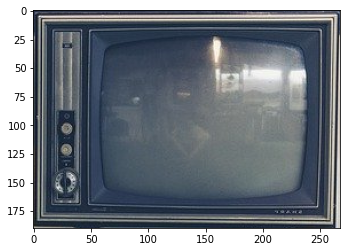

In [116]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../../figures/televisao.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# recortando uma imagem
imagem_recortada = imagem[30:220, 62:330]

# horizontal flip (especificado pelo valor 1)
tv_flip_horizontal = cv2.flip(imagem_recortada, 1)
plt.imshow(tv_flip_horizontal)

### 2. Redimensione a imagem gato.jpg para 190 pixels de altura e 268 pixels de largura e misture com a imagem da televisão recortada de forma que o gato apareça dentro da tela da tv. Dica: crie uma máscara retangular com o tamanho da tela.

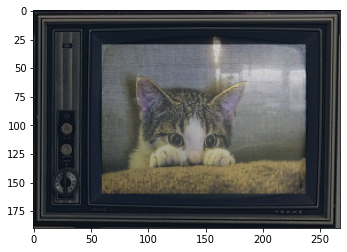

In [121]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

# abrindo a imagem da televisao
imagem = cv2.imread('../../figures/televisao.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# recortando uma imagem
imagem_recortada = imagem[30:220, 62:330]

# horizontal flip (especificado pelo valor 1)
tv_flip_horizontal = cv2.flip(imagem_recortada, 1)

# abrindo a imagem do gato
imagem = cv2.imread('../../figures/gato.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# definindo a nova resolução da imagem
x = 268 # em pixels
y = 190

# redimensionando a imagem
imagem_redimensionada = cv2.resize(imagem, (x, y), cv2.INTER_LINEAR)

# mascara para sobrepor a região da tele da tv
mascara = np.zeros(imagem_redimensionada.shape[:2], dtype=np.uint8)
(cX, cY) = (x // 2, y // 2)
mascara[30:y-30, 60:x-30] = 255

# aplicando a operação and entre a imagem do gato e a mascara
imagem_gato_mascara = cv2.bitwise_and(imagem_redimensionada,imagem_redimensionada, mask=mascara)

# misturando as imagens
imagem_resultante = cv2.addWeighted(tv_flip_horizontal, 0.5, imagem_gato_mascara, 0.5, 0)

# mostrando a imagem resultante
plt.imshow(imagem_resultante)